In [1]:
import os
import dotenv
import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
API_KEY = os.environ["ALPHA_VANTAGE_API_KEY"] # Your alpha vantage api key goes here
ts = TimeSeries(key=API_KEY, output_format='pandas')

tickers = ['TSLA', 'ZM', 'BABA', 'NIO', 'BA', 'AMZN', 'AAL', 'TWTR']

class Company():
    def __init__(self, ticker):
        self.ticker = ticker
        self.data, self.meta_data = ts.get_intraday(symbol=ticker, interval='1min', outputsize='full')
    
    def get_minute_close(init):
        close = data['4. close'].copy()
        close.index = 60 * close.index.hour + close.index.minute
        close = close.reset_index()
        close.columns = ['minute', 'close_price']
        return close


In [3]:
# companies = [Company(ticker) for ticker in tickers]

companies = []


for i in range(len(tickers)):
    print(i)
    companies.append(Company(tickers[i]))
    time.sleep(12) # dut to API query limit

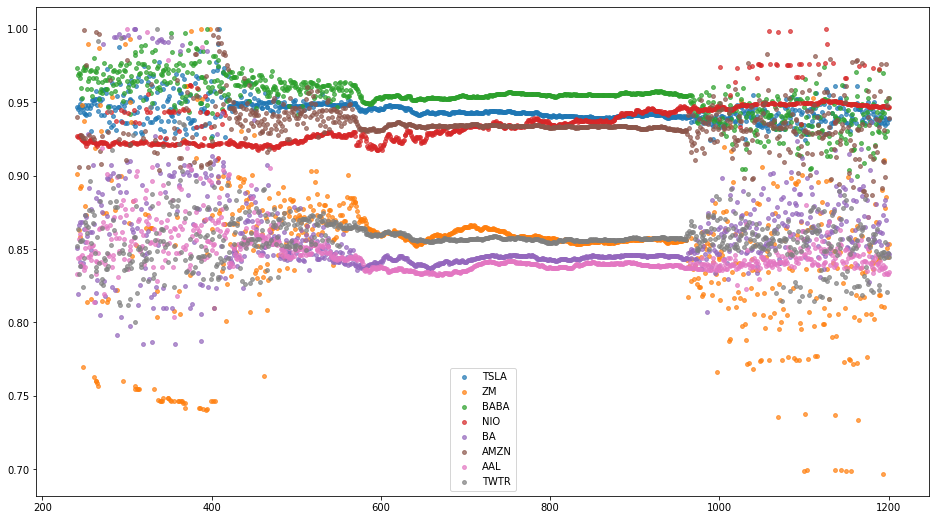

In [4]:
plt.figure(figsize=(16,9))
for company in companies:
    data = company.data
    close = company.get_minute_close()
    minute_mean = close.groupby('minute').mean().copy()
    minute_mean /= np.amax(minute_mean)
    plt.scatter(minute_mean.index, minute_mean, alpha=0.7, s=15)
    plt.legend(tickers)

In [5]:
# # Use this next when finding price per weekday
# close.index = [date.weekday() for date in close.index]